In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [7]:
data_pathname = "/Users/danielbrand/Documents/Uni/Master/1. Semester/Big Data Management/Final Project/final_full_station70_cyclic_<5_yesno.csv"
data = pd.read_csv(data_pathname)

In [3]:
y = data.enough_bikes

data_features = ['daytime_cyclic',
       'day_is_monday', 'day_is_tuesday', 'day_is_wednesday',
       'day_is_thursday', 'day_is_friday', 'day_is_saturday', 'day_is_sunday',
       'is_weekend', 'month_is_january', 'month_is_february',
       'month_is_march', 'month_is_april', 'month_is_may', 'month_is_june',
       'month_is_july', 'month_is_august', 'month_is_september',
       'month_is_october', 'month_is_november', 'month_is_december',
       'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'wind_direction_cyclic',
       'precipitation_inches', 'cloud_cover', 'is_rainy', 'is_foggy']
X = data[data_features]

In [8]:
model = LogisticRegression()

Optimal number of features : 9
Best features :
 Index(['daytime_cyclic', 'day_is_wednesday', 'day_is_saturday',
       'day_is_sunday', 'is_weekend', 'month_is_march', 'month_is_june',
       'month_is_december', 'max_visibility_miles'],
      dtype='object')
Importance of selected features :
 [[2.67480637 0.30018668 0.65768221 0.89472687 1.55240908 0.44971407
  0.32977046 0.58460693 0.52043575]]


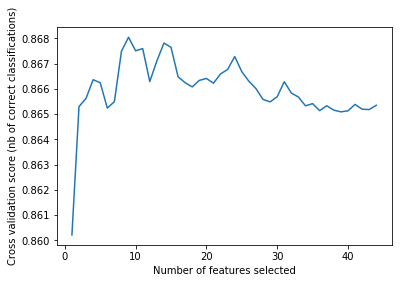

In [10]:
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy') # Evaluate the RFECV with regard to 'accuracy' of predictions
rfecv.fit(X, y)

# Print results of RFECV
print('Optimal number of features : %d' % rfecv.n_features_)
print('Best features :\n', X.columns[rfecv.support_])
print('Importance of selected features :\n', np.absolute(rfecv.estimator_.coef_))
# Plot number of features (x) and cross validation score (y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [6]:


print(rfecv.grid_scores_)

[0.86022045 0.86626159 0.86853395 0.86793596 0.86684402 0.86760536
 0.86618283 0.86628395 0.86659316 0.86698112 0.86575695 0.86771718
 0.86805458 0.86754313 0.86777844 0.86786692 0.86780566 0.86791846
 0.8679311  0.86768996 0.8677026  0.86784553 0.86761606 0.86769482
 0.8670803  0.86693834 0.86649009 0.86643369 0.86462514 0.86530773
 0.86551386 0.86582695 0.86357988 0.86347001 0.86333291 0.86322789
 0.86316858 0.86345445 0.86281465 0.86267755 0.86271547 0.86259976
 0.86283799 0.86226819]
